Are men healthier than women?

In [72]:
import numpy as np 
import pandas as pd
import thinkplot
import thinkstats2
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [6]:
#import data with semicolon delimiter
df = pd.read_csv("C:/Users/pvpatel/Desktop/ThinkStats2-master/ThinkStats2-master/code/CVD_DATA.csv", sep=';')

In [7]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [9]:
#transform age into an int round down
df['age_num'] = np.floor(df.age/365)


In [10]:
#combine height and weight to create BMI
df['bmi'] = df.weight/((df.height/100)**2)

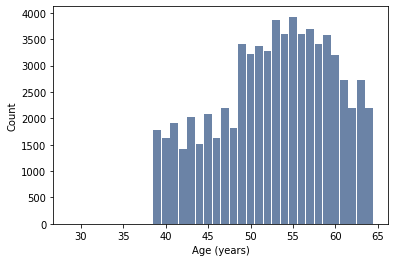

In [11]:
#histogram of age

hist_age = thinkstats2.Hist(df.age_num)
thinkplot.Hist(hist_age)
thinkplot.Config(xlabel='Age (years)', ylabel='Count')

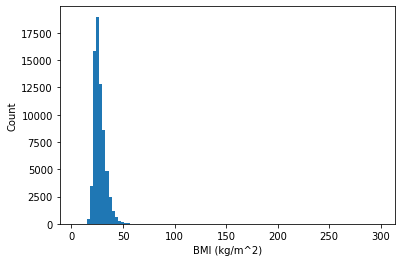

In [12]:
plt.hist(df.bmi, bins=100)
plt.xlabel('BMI (kg/m^2)')
plt.ylabel('Count')
plt.show()

In [13]:
#clean BMI
df.loc[df.bmi > 70 , 'bmi'] = np.nan
df.loc[df.bmi < 10 , 'bmi'] = np.nan

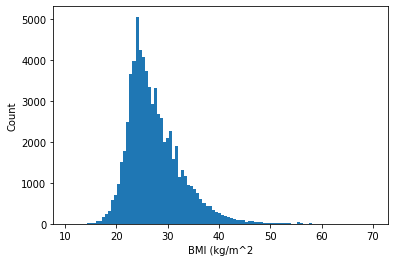

In [14]:
#Clean BMI histogram
plt.hist(df.bmi, bins=100)
plt.xlabel('BMI (kg/m^2')
plt.ylabel('Count')
plt.show()

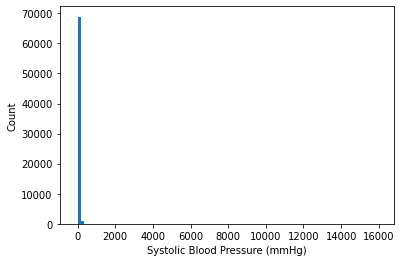

In [15]:
#histogram of SBP
plt.hist(df.ap_hi, bins=100)
plt.xlabel('Systolic Blood Pressure (mmHg)')
plt.ylabel('Count')
plt.show()

In [16]:
#clean SBP of outerliers
df.loc[df.ap_hi > 240 , 'ap_hi'] = np.nan
df.loc[df.ap_hi < 60 , 'ap_hi'] = np.nan

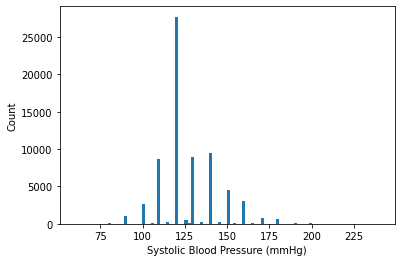

In [17]:
#histogram of SBP cleaned
plt.hist(df.ap_hi, bins=100)
plt.xlabel('Systolic Blood Pressure (mmHg)')
plt.ylabel('Count')
plt.show()

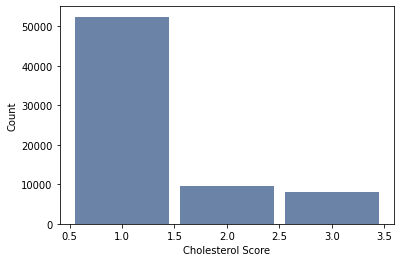

In [18]:
#histogram of cholesterol

hist_chl = thinkstats2.Hist(df.cholesterol)
thinkplot.Hist(hist_chl)
thinkplot.Config(xlabel='Cholesterol Score', ylabel='Count')

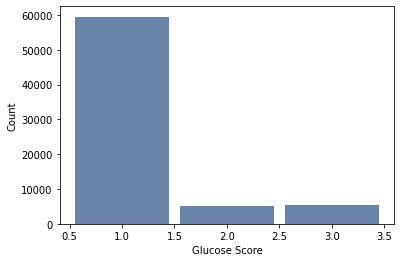

In [19]:
#histogram of cholesterol

hist_glu = thinkstats2.Hist(df.gluc)
thinkplot.Hist(hist_glu)
thinkplot.Config(xlabel='Glucose Score', ylabel='Count')

In [20]:
#create two subsets of the data
female = df[df.gender == 1]
male = df[df.gender == 2]

In [21]:
#create PMF of each gender
female_pmf = thinkstats2.Pmf(female.ap_hi, label='Female')
male_pmf = thinkstats2.Pmf(male.ap_hi, label='Male')

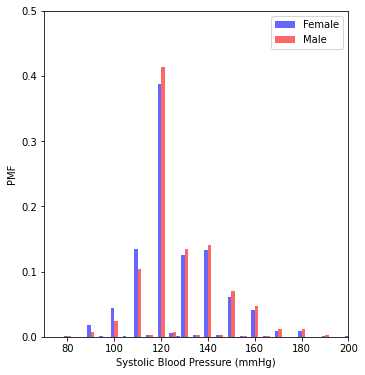

In [22]:
width=1.5
axis = [70, 200, 0, 0.5]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(female_pmf, align='right', width=width, color='blue')
thinkplot.Hist(male_pmf, align='left', width=width, color='red')
thinkplot.Config(xlabel='Systolic Blood Pressure (mmHg)', ylabel='PMF', axis=axis)

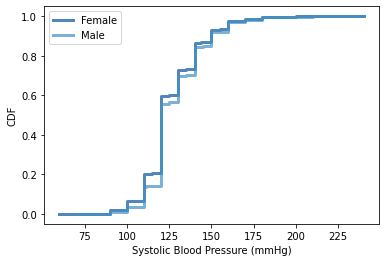

In [23]:
#CDF of Systolic blood pressure male vs female

female_cdf = thinkstats2.Cdf(female.ap_hi, label='Female')
male_cdf = thinkstats2.Cdf(male.ap_hi, label='Male')

thinkplot.PrePlot(2)
thinkplot.Cdfs([female_cdf, male_cdf])
thinkplot.Config(xlabel='Systolic Blood Pressure (mmHg)', ylabel='CDF')

In [24]:
# drop rows with SBP as NA
df_new = df.dropna()
sbp = df_new.ap_hi
age = df_new.age_num
bmi = df_new.bmi


Mean, Var 126.77006599645873 242.02414573367642
Sigma 15.557125240020293


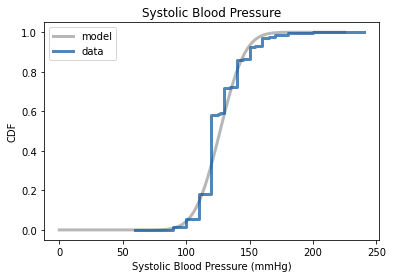

In [25]:
#normal distrubtion model 
# I'll use a normal model to fit the distribution of SBP from the data set

# estimate parameters: trimming outliers yields a better fit
mu, var = thinkstats2.TrimmedMeanVar(sbp, p=0.01)
print('Mean, Var', mu, var)
    
# plot the model
sigma = np.sqrt(var)
print('Sigma', sigma)
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=225)

thinkplot.Plot(xs, ps, label='model', color='0.6')

# plot the data
cdf = thinkstats2.Cdf(sbp, label='data')

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf) 
thinkplot.Config(title='Systolic Blood Pressure',
                 xlabel='Systolic Blood Pressure (mmHg)',
                 ylabel='CDF')

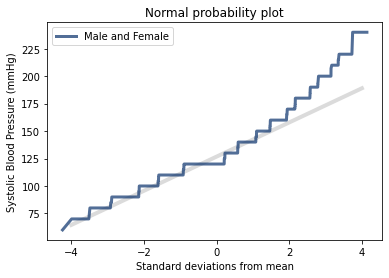

In [26]:
#normal probablity plot

mean, var = thinkstats2.TrimmedMeanVar(sbp, p=0.01)
std = np.sqrt(var)

xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color='0.8')

xs, ys = thinkstats2.NormalProbability(sbp)
thinkplot.Plot(xs, ys, label='Male and Female')

thinkplot.Config(title='Normal probability plot',
                 xlabel='Standard deviations from mean',
                 ylabel='Systolic Blood Pressure (mmHg)')

In [27]:
# log normal distrubtion

def MakeNormalModel(sbp):
    """Plots a CDF with a Normal model.

    weights: sequence
    """
    cdf = thinkstats2.Cdf(sbp, label='Systolic Blood Pressure')

    mean, var = thinkstats2.TrimmedMeanVar(sbp)
    std = np.sqrt(var)
    print('n, mean, std', len(sbp), mean, std)

    xmin = mean - 4 * std
    xmax = mean + 4 * std

    xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)
    thinkplot.Plot(xs, ps, label='model', linewidth=4, color='0.8')
    thinkplot.Cdf(cdf)

n, mean, std 69731 126.77006599645873 15.557125240020293


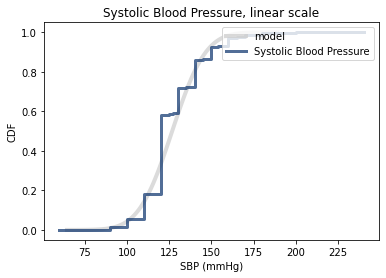

In [28]:
#linear
MakeNormalModel(sbp)
thinkplot.Config(title='Systolic Blood Pressure, linear scale', xlabel='SBP (mmHg)',
                 ylabel='CDF', loc='upper right')

n, mean, std 69731 2.099867446986547 0.051900430260700174


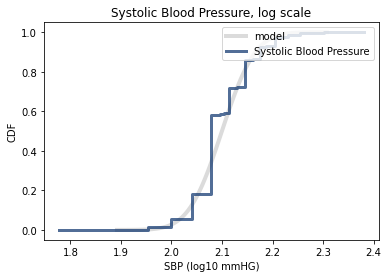

In [29]:
#lognormal
log_sbp = np.log10(sbp)
MakeNormalModel(log_sbp)
thinkplot.Config(title='Systolic Blood Pressure, log scale', xlabel='SBP (log10 mmHG)',
                 ylabel='CDF', loc='upper right')

In [30]:
def MakeNormalPlot(sbp):
    """Generates a normal probability plot of sbp's.

    sbp: sequence
    """
    mean, var = thinkstats2.TrimmedMeanVar(sbp, p=0.01)
    std = np.sqrt(var)

    xs = [-5, 5]
    xs, ys = thinkstats2.FitLine(xs, mean, std)
    thinkplot.Plot(xs, ys, color='0.8', label='model')

    xs, ys = thinkstats2.NormalProbability(sbp)
    thinkplot.Plot(xs, ys, label='Systolic Blood Pressure')

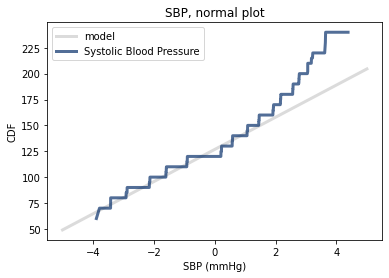

In [31]:
MakeNormalPlot(sbp)
thinkplot.Config(title='SBP, normal plot', xlabel='SBP (mmHg)',
                 ylabel='CDF', loc='upper left')

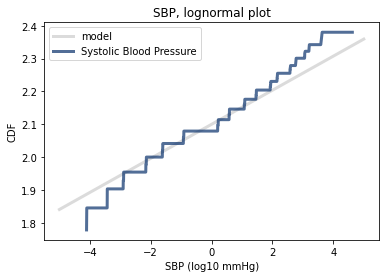

In [32]:
MakeNormalPlot(log_sbp)
thinkplot.Config(title='SBP, lognormal plot', xlabel='SBP (log10 mmHg)',
                 ylabel='CDF', loc='upper left')

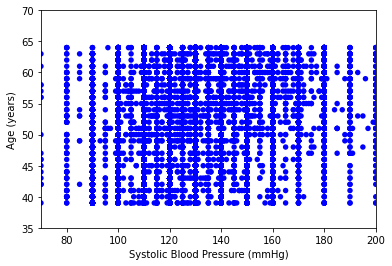

In [33]:
thinkplot.Scatter(sbp, age, alpha=1)
thinkplot.Config(xlabel='Systolic Blood Pressure (mmHg)',
                 ylabel='Age (years)',
                 axis=[70, 200, 35, 70],
                 legend=False)

In [34]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [35]:
Cov(sbp, age)

23.812827363985065

In [36]:
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [37]:
Corr(sbp, age)

0.20590506051996743

In [38]:
def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

In [98]:
print('Covariance', Cov(sbp, age))
print('Correlation', Corr(sbp, age))
print("Spearman's Correlation", SpearmanCorr(sbp, age))

Covariance 23.812827363985065
Correlation 0.20590506051996743
Spearman's Correlation 0.2219049453429348


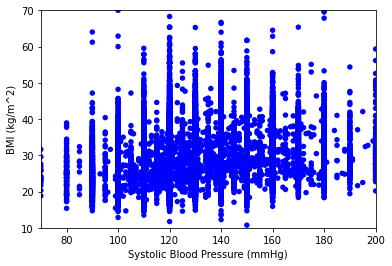

In [40]:
thinkplot.Scatter(sbp, bmi, alpha=1)
thinkplot.Config(xlabel='Systolic Blood Pressure (mmHg)',
                 ylabel='BMI (kg/m^2)',
                 axis=[70, 200, 10, 70],
                 legend=False)

In [41]:
print('Covariance', Cov(sbp, bmi))
print('Correlation', Corr(sbp, bmi))
print("Spearman's Correlation", SpearmanCorr(sbp, bmi))

Covariance 24.120294511534983
Correlation 0.2670043348809877
Spearman's Correlation 0.2830867035927613


In [42]:
#compute the p-value of the observed difference in systolic blood pressure means in men and women
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [46]:
#create two new subsets of the df_new with drop na values
female_new = df_new[df_new.gender == 1]
male_new = df_new[df_new.gender == 2]

In [68]:
data = male_new.bmi.values, female_new.bmi.values

In [99]:
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
print(f'{pvalue:.2f}')

0.00


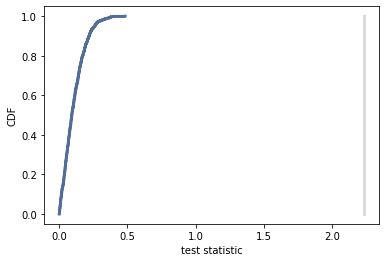

In [51]:
ht.PlotCdf()
thinkplot.Config(xlabel='test statistic',
                   ylabel='CDF')

In [52]:
class DiffMeansOneSided(DiffMeansPermute):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = group1.mean() - group2.mean()
        return test_stat

In [53]:
ht = DiffMeansOneSided(data)
pvalue = ht.PValue()
pvalue

0.0

In [95]:
#logistic regression on have cardiovascual diseases i.e cardio = 1
formula = 'cardio ~ gender + bmi + ap_hi + cholesterol + gluc'
model = smf.logit(formula, data=df_new)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.572289
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 cardio   No. Observations:                69731
Model:                          Logit   Df Residuals:                    69725
Method:                           MLE   Df Model:                            5
Date:                Fri, 04 Jun 2021   Pseudo R-squ.:                  0.1744
Time:                        14:30:23   Log-Likelihood:                -39906.
converged:                       True   LL-Null:                       -48334.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -9.2780      0.094    -98.579      0.000      -9.462      -9.094
gender         -0.0291      0.018     -1.609      0.108      -0.065       0.006
bmi             0.0300      0.002     17.058      0.000       0.027       0.033
ap_hi           0.0626      0.001     91.464      0.000       0.061       0.064
cholesterol     0.5301      0.015     34.733      0.000       0.500       0.560
gluc           -0.0930      0.017     -5.351      0.000      -0.127      -0.059
===============================================================================
"""

In [96]:
endog = pd.DataFrame(model.endog, columns=[model.endog_names])
exog = pd.DataFrame(model.exog, columns=model.exog_names)

In [97]:
#accuracy of predictor model
actual = endog['cardio']
baseline = actual.mean()
baseline

0.4996343089873944